<a href="https://colab.research.google.com/github/Maria-Sanjana/SIT723-ResearchProject_A_Maria/blob/main/ecg_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing the necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras import layers, losses
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model

In [4]:
#Loading the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('ecg.csv', header = None)

Saving ecg.csv to ecg.csv


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [7]:
#Now I will separate the data and labels so that it will be easy

data = df.iloc[:,:-1].values
labels = df.iloc[:,-1].values
data

array([[-0.11252183, -2.8272038 , -3.7738969 , ...,  0.12343082,
         0.92528624,  0.19313742],
       [-1.1008778 , -3.9968398 , -4.2858426 , ...,  0.77381971,
         1.1196209 , -1.4362499 ],
       [-0.56708802, -2.5934502 , -3.8742297 , ...,  0.32109663,
         0.90422673, -0.42179659],
       ...,
       [-1.1229693 , -2.2529248 , -2.8676281 , ..., -2.874136  ,
        -2.0083694 , -1.8083338 ],
       [-0.54770461, -1.8895451 , -2.8397786 , ...,  1.261335  ,
         1.1504486 ,  0.80493225],
       [-1.3517791 , -2.2090058 , -2.5202247 , ..., -2.2600228 ,
        -1.577823  , -0.68453092]])

In [8]:
#train-test split
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size = 0.2, random_state = 21)

In [9]:
#Normalizing the data
#calculating the maximum and minimum value from the training set 
min = tf.reduce_min(train_data)
max = tf.reduce_max(train_data)

#using the formula (data - min)/(max - min)
train_data = (train_data - min)/(max - min)
test_data = (test_data - min)/(max - min)

#converting the data into float
train_data = tf.cast(train_data, dtype=tf.float32)
test_data = tf.cast(test_data, dtype=tf.float32)

In [10]:
#The labels are either 0 or 1, so I will convert them into boolean(true or false) 
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

#Now let's separate the data for normal ECG from that of abnormal ones
#Normal ECG data
n_train_data = train_data[train_labels]
n_test_data = test_data[test_labels]

#Abnormal ECG data
an_train_data = train_data[~train_labels]
an_test_data = test_data[~test_labels]


print(n_train_data)

tf.Tensor(
[[0.57030463 0.46561658 0.29058117 ... 0.48504233 0.4233502  0.47598344]
 [0.48320588 0.28246963 0.16471253 ... 0.567567   0.4677294  0.2692329 ]
 [0.48144642 0.35151404 0.25972766 ... 0.5479421  0.5077544  0.54298663]
 ...
 [0.41039047 0.24164985 0.13120876 ... 0.5277313  0.5654091  0.5023885 ]
 [0.5397748  0.4140786  0.28101394 ... 0.51266515 0.43706053 0.4426865 ]
 [0.29639772 0.15988176 0.18883787 ... 0.53766966 0.545786   0.40826708]], shape=(2359, 140), dtype=float32)


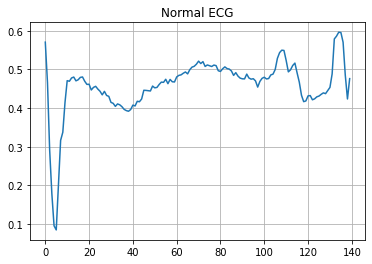

In [11]:
plt.plot(np.arange(140), n_train_data[0])
plt.grid()
plt.title('Normal ECG')
plt.show()

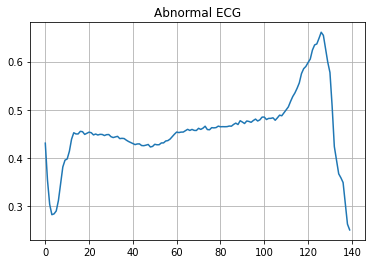

In [12]:
plt.plot(np.arange(140), an_train_data[0])
plt.grid()
plt.title('Abnormal ECG')
plt.show()

In [13]:
#defining the model!
#using the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
 
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        layers.Dense(16, activation='relu'),
                                        layers.Dense(32, activation='relu'),
                                        layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


In [14]:
#compiling and training the model!!
autoencoder = detector()
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(n_train_data, n_train_data, epochs = 20, batch_size=512, validation_data=(n_test_data, n_test_data))

Epoch 1/20
5/5 [==============================] - 2s 94ms/step - loss: 0.0577 - val_loss: 0.0565
Epoch 2/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0556 - val_loss: 0.0538
Epoch 3/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0524 - val_loss: 0.0497
Epoch 4/20
5/5 [==============================] - 0s 19ms/step - loss: 0.0480 - val_loss: 0.0451
Epoch 5/20
5/5 [==============================] - 0s 20ms/step - loss: 0.0436 - val_loss: 0.0411
Epoch 6/20
5/5 [==============================] - 0s 17ms/step - loss: 0.0397 - val_loss: 0.0373
Epoch 7/20
5/5 [==============================] - 0s 14ms/step - loss: 0.0362 - val_loss: 0.0343
Epoch 8/20
5/5 [==============================] - 0s 15ms/step - loss: 0.0335 - val_loss: 0.0320
Epoch 9/20
5/5 [==============================] - 0s 18ms/step - loss: 0.0314 - val_loss: 0.0301
Epoch 10/20
5/5 [==============================] - 0s 16ms/step - loss: 0.0297 - val_loss: 0.0285
Epoch 11/20
5/5 [============

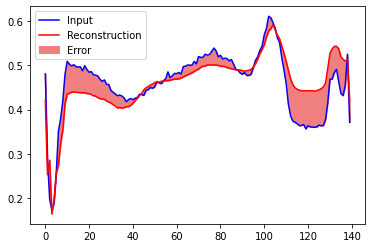

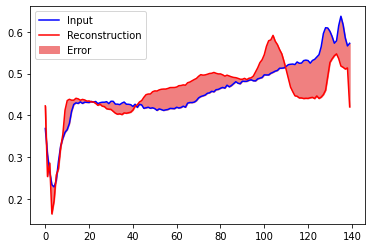

In [15]:
#defining a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  enc_img = autoencoder.encoder(data)
  dec_img = autoencoder.decoder(enc_img)
  plt.plot(data[n], 'b')
  plt.plot(dec_img[n], 'r')
  plt.fill_between(np.arange(140), data[n], dec_img[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

plot(n_test_data, 0)
plot(an_test_data, 0)

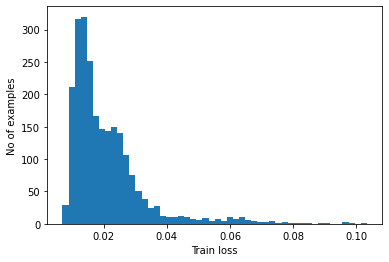

In [16]:
reconstructions = autoencoder.predict(n_train_data)
train_loss = tf.keras.losses.mae(reconstructions, n_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [17]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)


Threshold:  0.033280108


In [18]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))
  print("Confusion matrix:\n{}".format(confusion_matrix(labels, predictions)))

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)


Accuracy = 0.945
Precision = 0.9922027290448343
Recall = 0.9089285714285714
Confusion matrix:
[[436   4]
 [ 51 509]]


In [36]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel="linear", gamma=1, nu =0.9)
model.fit(train_data)
preds_1svm = model.predict(test_data)

In [37]:
preds_1svm = np.where(preds_1svm == 1, 0, 1)

print_stats(preds_1svm, test_labels)

Accuracy = 0.472
Precision = 0.5176600441501104
Recall = 0.8375
Confusion matrix:
[[  3 437]
 [ 91 469]]


In [56]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=1000, max_samples=800, contamination='auto', max_features=1.0, verbose=1, warm_start=False, random_state=21)
model.fit(train_data)
preds_iso = model.predict(test_data)




[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished


In [57]:

preds_iso = np.where(preds_iso == 1, 0, 1)



In [58]:

print_stats(preds_iso, test_labels)


Accuracy = 0.435
Precision = 0.43902439024390244
Recall = 0.03214285714285714
Confusion matrix:
[[417  23]
 [542  18]]


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=3, leaf_size=10, algorithm='auto', contamination='auto', )
preds_lof = clf.fit_predict(data)

preds_lof

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
preds_lof = np.where(preds_lof == 1, 0, 1)


In [ ]:
print_stats(preds_lof, labels)


Accuracy = 0.41636654661864747
Precision = 0.5039370078740157
Recall = 0.043850633778691334
Confusion matrix:
[[1953  126]
 [2791  128]]


   Datasets  OneClassSVM  iForest    LOF  AutoEncoder
0       ECG        43.10    41.10  41.61        94.50
1       CTG        76.33    80.27  76.00        34.00
2  Diabetes        68.00    66.30  65.40        38.31


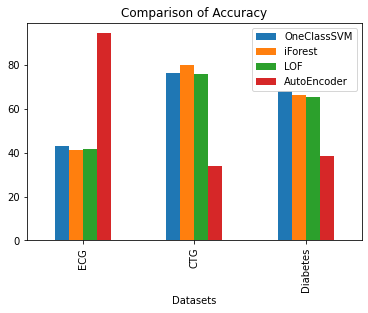

In [ ]:
#Visualizing the results
  
# create data
df = pd.DataFrame([['ECG', 43.10, 41.10, 41.61, 94.5], ['CTG', 76.33, 80.27, 76, 34], ['Diabetes', 68, 66.3, 65.4, 38.31]],
                  columns=['Datasets', 'OneClassSVM', 'iForest', 'LOF', 'AutoEncoder'])
# view data
print(df)
  
# plot grouped bar chart
df.plot(x='Datasets',
        kind='bar',
        stacked=False,
        title='Comparison of Accuracy')

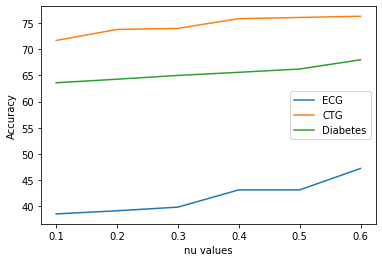

In [14]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
c = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
x = [38.5, 39.1, 39.8, 43.1, 43.1, 47.2]
y = [71.7, 73.8, 74.01, 75.87, 76.1, 76.33]
z = [63.6, 64.28, 65, 65.6, 66.23, 68] 
# plot lines
plt.plot(c, x, label = "ECG")
plt.plot(c, y, label = "CTG")
plt.plot(c, z, label = "Diabetes")
plt.xlabel("nu values")
plt.ylabel("Accuracy")

plt.legend()
plt.show() 

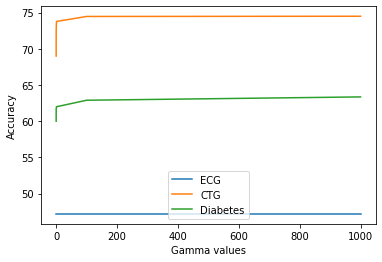

In [17]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
c = [0.001, 0.01, 0.1, 1, 100, 1000]
x = [47.2, 47.2, 47.2, 47.2, 47.2, 47.2]
y = [69, 71, 72.62, 73.78, 74.47, 74.5]
z = [60, 60.6, 61.7, 62, 62.9, 63.36] 
# plot lines
plt.plot(c, x, label = "ECG")
plt.plot(c, y, label = "CTG")
plt.plot(c, z, label = "Diabetes")
plt.xlabel("Gamma values")
plt.ylabel("Accuracy")

plt.legend()
plt.show() 

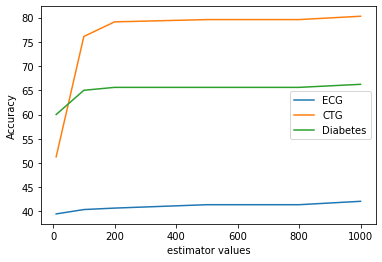

In [18]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
c = [10, 100, 200, 500, 800, 1000]
x = [39.5, 40.4, 40.7, 41.4, 41.4, 42.1]
y = [51.28, 76.1, 79.11, 79.58, 79.58, 80.27]
z = [60, 65, 65.6, 65.6, 65.6, 66.23] 
# plot lines
plt.plot(c, x, label = "ECG")
plt.plot(c, y, label = "CTG")
plt.plot(c, z, label = "Diabetes")
plt.xlabel("estimator values")
plt.ylabel("Accuracy")

plt.legend()
plt.show() 

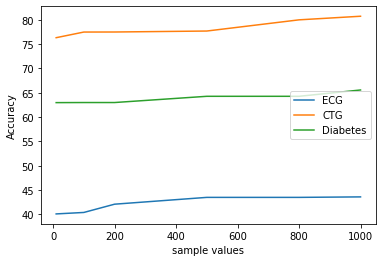

In [19]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
c = [10, 100, 200, 500, 800, 1000]
x = [40.1, 40.4, 42.1, 43.5, 43.5, 43.6]
y = [76.33, 77.49, 77.5, 77.7, 80, 80.74]
z = [62.98, 63, 63, 64.28, 64.28, 65.58] 
# plot lines
plt.plot(c, x, label = "ECG")
plt.plot(c, y, label = "CTG")
plt.plot(c, z, label = "Diabetes")
plt.xlabel("sample values")
plt.ylabel("Accuracy")

plt.legend()
plt.show() 

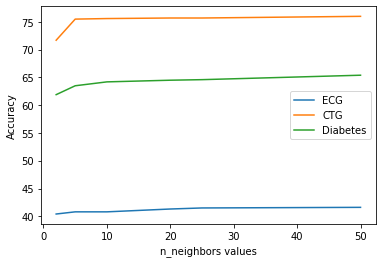

In [21]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
c = [2, 5, 10, 20, 25, 50]
x = [40.41, 40.8, 40.8, 41.31, 41.5, 41.61]
y = [71.7, 75.5, 75.6, 75.7, 75.7, 76]
z = [61.9, 63.5, 64.2, 64.5, 64.6, 65.4] 
# plot lines
plt.plot(c, x, label = "ECG")
plt.plot(c, y, label = "CTG")
plt.plot(c, z, label = "Diabetes")
plt.xlabel("n_neighbors values")
plt.ylabel("Accuracy")

plt.legend()
plt.show()